# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",150)


## Reading the data

In [2]:
df= pd.read_csv("hour.csv")

In [3]:
# Create a copy of my data
df_copy = df.copy()

# Understanding The data

In [4]:
# Dataset Shape
shape = df.shape

print(f"the data has {df.shape[0]} rows, and {df.shape[1]} columns")

the data has 17379 rows, and 17 columns


In [5]:
# Check Dtypes
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# Print first 5 rows.
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Drop instant column since it's useless
df= df.drop("instant",axis=1)

### Describtive Statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


### Check for missing values.

In [9]:
df.isnull().any()

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

### Convert the values to be human readible

In [4]:
df["season"]=df["season"].map({1:"winter", 2:"spring", 3:"summer", 4:"fall"})
df["yr"] = df["yr"].map({0:2011,1:2012})
df["weathersit"]= df["weathersit"].map({1:"clear",2:"cloudy",3:"light rain",4:"heavy rain"})



In [5]:
df["weekday"] = df["weekday"].map( {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'})


In [6]:
# Convert humidity to percentage value also for wind speed.
df["hum"] = df["hum"]*100
df["windspeed"] = df["windspeed"] * 67

## Sample to check the final shape of the data.

In [13]:
df.sample(15)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3149,2011-05-16,spring,2011,5,3,0,Monday,1,clear,0.50,0.4848,94.0,11.0014,1,3,4
13416,2012-07-18,summer,2012,7,5,0,Wednesday,1,clear,0.72,0.6818,70.0,11.0014,5,41,46
11255,2012-04-19,spring,2012,4,4,0,Thursday,1,cloudy,0.42,0.4242,71.0,0.0000,0,4,4
14926,2012-09-19,summer,2012,9,3,0,Wednesday,1,cloudy,0.52,0.5000,63.0,16.9979,1,4,5
5329,2011-08-14,summer,2011,8,23,0,Sunday,0,light rain,0.60,0.5606,83.0,0.0000,5,22,27
5598,2011-08-26,summer,2011,8,4,0,Friday,1,clear,0.62,0.5606,88.0,0.0000,2,6,8
8271,2011-12-16,fall,2011,12,7,0,Friday,1,cloudy,0.38,0.3939,46.0,19.9995,5,226,231
16638,2012-12-01,fall,2012,12,1,0,Saturday,0,clear,0.26,0.3030,81.0,0.0000,5,64,69
6376,2011-09-28,fall,2011,9,6,0,Wednesday,1,light rain,0.60,0.5152,94.0,11.0014,3,111,114
8978,2012-01-14,winter,2012,1,23,0,Saturday,0,clear,0.16,0.1515,47.0,15.0013,5,71,76


### Registered  VS Casual Rides

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


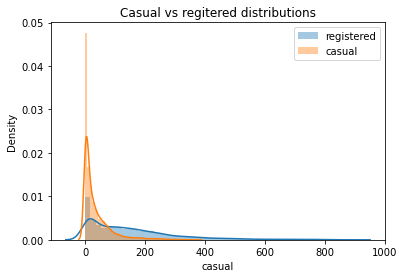

In [7]:
sns.distplot(df["registered"],label="registered")
sns.distplot(df["casual"],label="casual")
plt.title("Casual vs regitered distributions")
plt.legend()

plt.savefig("Registered vs casual rides.png")


### Observations :

- the registered rides is more than casual rides


### Rides Distribution Over the time.

In [9]:
subset = df[["dteday","casual","registered"]]
subset.head()

,dteday,casual,registered
0,2011-01-01,3,13
1,2011-01-01,8,32
2,2011-01-01,5,27
3,2011-01-01,3,10
4,2011-01-01,0,1


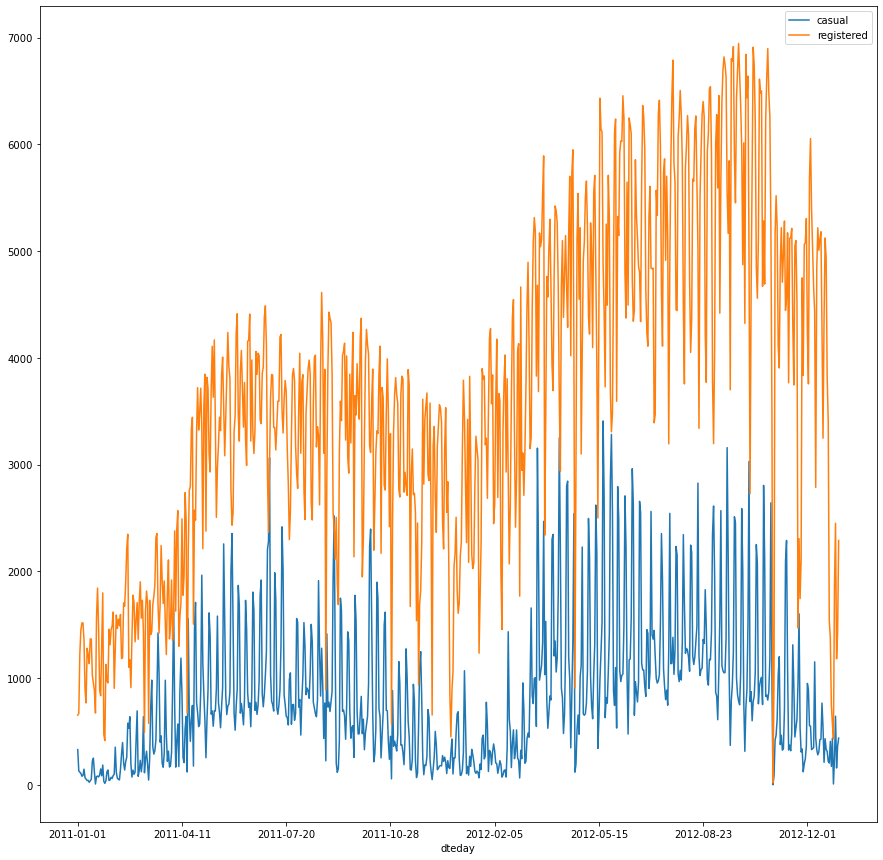

In [10]:
subset.groupby("dteday").sum().plot(figsize=(15,15))

plt.savefig("fig2.png")

## Observations :

- there's a drop in the total number of rides in the winter season

### Using Rolling Statistics to get better view.

In [12]:
subset = subset.groupby("dteday").sum()
rolled_mean = subset.rolling(8).mean()
rolled_std = subset.rolling(8).std()

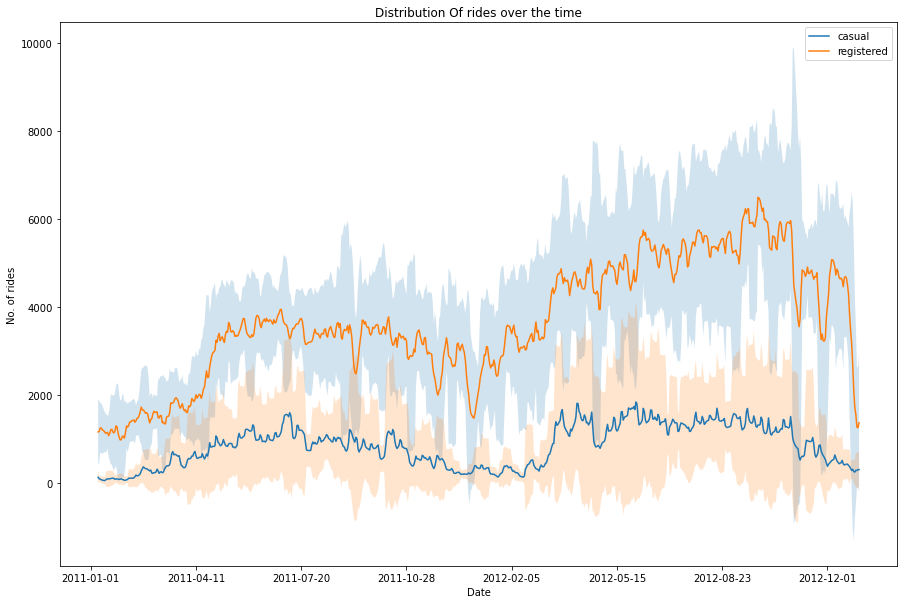

In [14]:
ax = rolled_mean.plot(figsize=(15,10))
ax.fill_between(rolled_mean.index,rolled_mean["registered"]+2*rolled_std['registered'],rolled_mean["registered"]-2*rolled_std["registered"],alpha=0.2)
ax.fill_between(rolled_mean.index,rolled_mean["casual"]+2*rolled_std['casual'],rolled_mean["casual"]-2*rolled_std["casual"],alpha=0.2)
ax.set_title("Distribution Of rides over the time")
ax.set_xlabel("Date")
ax.set_ylabel("No. of rides")
plt.savefig("Rides Distribution over time.png")

### Observations :

- from the preceeding plot we can assert that there's a drop in the winter season

### Distribution based on day of the week and hour.

In [15]:
subset = df[["weekday","hr","casual","registered"]]

In [20]:
subset.head()

,weekday,hr,casual,registered
0,Saturday,0,3,13
1,Saturday,1,8,32
2,Saturday,2,5,27
3,Saturday,3,3,10
4,Saturday,4,0,1


In [16]:
subset_melted  = subset.melt(id_vars=["hr","weekday"],var_name = "type", value_name="count")

In [22]:
subset_melted.head(30)

,hr,weekday,type,count
0,0,Saturday,casual,3
1,1,Saturday,casual,8
2,2,Saturday,casual,5
3,3,Saturday,casual,3
4,4,Saturday,casual,0
5,5,Saturday,casual,0
6,6,Saturday,casual,2
7,7,Saturday,casual,1
8,8,Saturday,casual,1
9,9,Saturday,casual,8


### Configuring Facetgrid to spot trends over days and hours.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


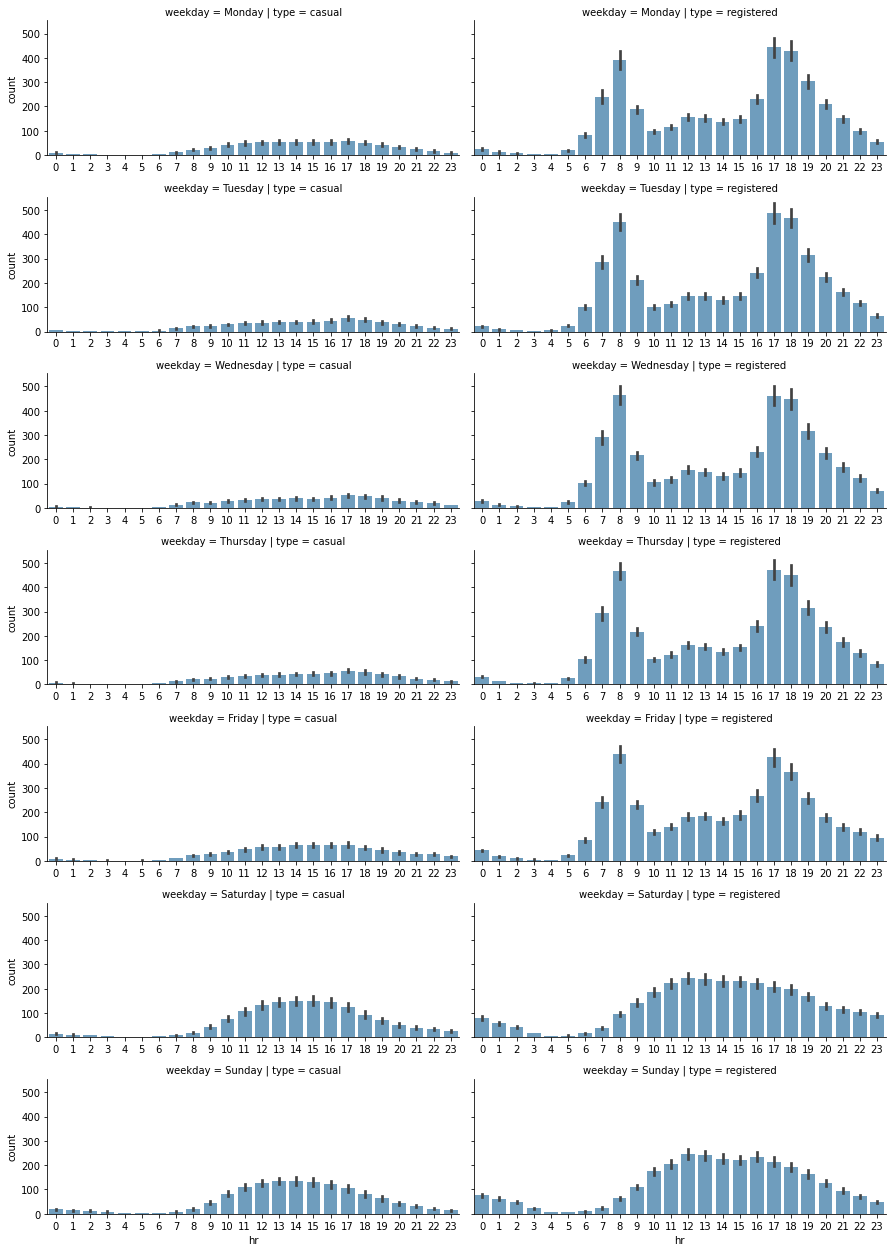

In [17]:
facet = sns.FacetGrid(data=subset_melted, col = "type", row = "weekday", height=2.5, aspect=2.5,sharex=False,row_order=['Monday', 'Tuesday', \
                                'Wednesday', 'Thursday', \
'Friday', 'Saturday', 'Sunday'])
# Create a Barplot
facet.map(sns.barplot, "hr","count",alpha=0.7)

plt.savefig("Facetgrid 1.png")

## Observations :

- There's more casual rides in the weekend.
- registered rides are more in workingdays which means  that is registered rides are for commuting to work
- The registered rides Trend are in 8am and 5pm


### Rides over the seasons and hours.

In [18]:
rides_seasons = df[["season","hr","registered","casual"]]

In [19]:
rides_seasons = rides_seasons.melt(id_vars=["season","hr"], var_name="type",value_name="count")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


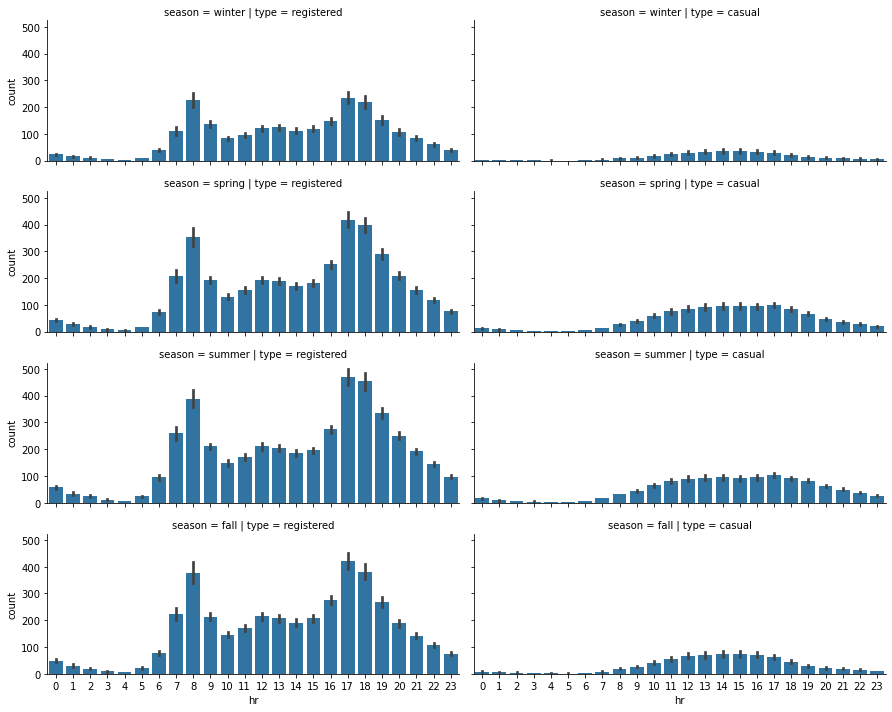

In [21]:
facet = sns.FacetGrid(rides_seasons, row = "season",col="type",height=2.5,aspect=2.5)
facet.map(sns.barplot, "hr", "count")
plt.savefig("fig4.png")

## Observations :

- There's a seasonal impact on the number of rides, which means that in the winter the total number of rides is lower.

### Distribution of rides over the weekdays.

In [22]:
weekdays = df[["season","weekday","registered","casual"]]
melted_weekdays = weekdays.melt(id_vars=["season","weekday"], var_name="type",value_name="count")

In [28]:
melted_weekdays.head()

,season,weekday,type,count
0,winter,Saturday,registered,13
1,winter,Saturday,registered,32
2,winter,Saturday,registered,27
3,winter,Saturday,registered,10
4,winter,Saturday,registered,1


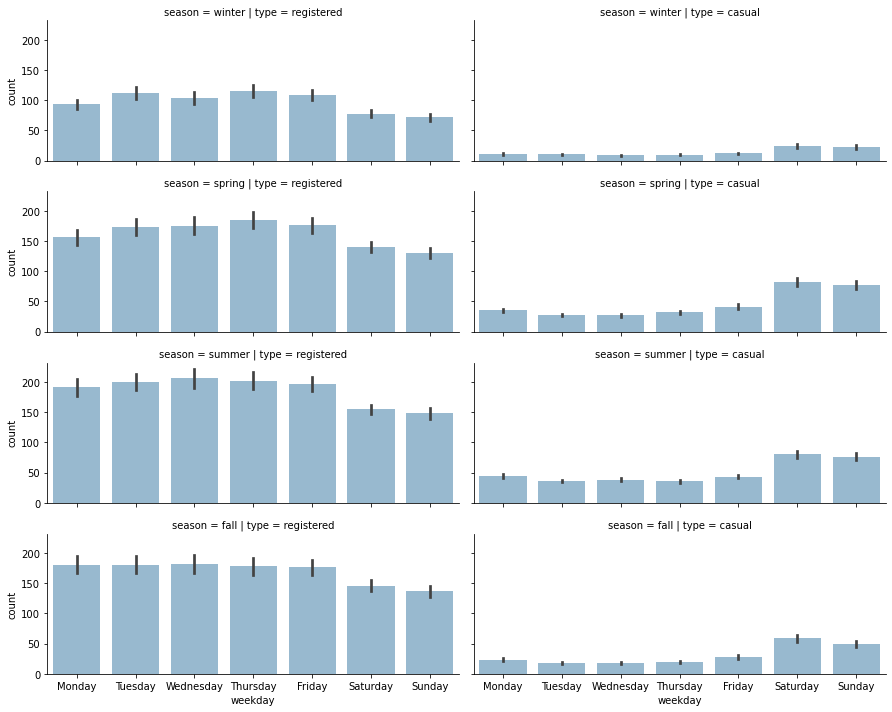

In [23]:
# Configure a Facetgrid to compare rides over the weekdays.
facet = sns.FacetGrid(melted_weekdays, row = "season",col="type",height=2.5,aspect=2.5,)
facet.map(sns.barplot, "weekday", "count",alpha=0.5,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
                'Friday', 'Saturday', 'Sunday'])
plt.savefig("fig6.png")                

## Observations :

- this is a conclusion of that the registered rides are used for commuting to work, and the winter has fewer rides for both casual and registered rides.

## Hypothesis Testing

### is there a statistical signigicant difference between registered rides in weekend and work days? 

- H0 : Registered rides in weekend - registered rides in workdays = 0 
- H1 : Registered rides in weekend - registered rides in workdays != 0 

In [24]:
workday = df[df["workingday"] == 1]
weekend = df[df["workingday"] != 1]

In [31]:
# Perform Hypothesis testing using scipy
from scipy.stats import ttest_ind

resault = ttest_ind(workday["registered"],weekend["registered"])



In [32]:
print(f"Statistic value: {resault[0]:.03f}, \
p-value: {resault[1]:.03f}")

Statistic value: 17.869, p-value: 0.000


- Since the p-value is less than than the 0.05 we can reject the null hypothesis, which means that there's a significant difference between registered rides in the week end and working days

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


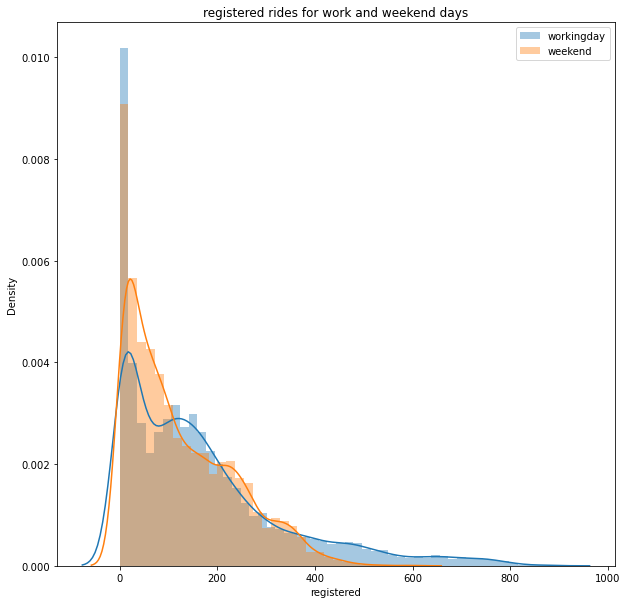

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(workday["registered"],label="workingday")
sns.distplot(weekend["registered"],label="weekend")

plt.legend()
plt.title("registered rides for work and weekend days")
plt.savefig("fig7.png")

### Is casual rides  more in the weekends?


In [34]:
workday = df[df["workingday"] == 1]
weekend = df[df["workingday"] != 1]

In [35]:
from scipy.stats import ttest_ind

resault = ttest_ind(workday["casual"],weekend["casual"])

print(f"Statistic value: {resault[0]:.03f}, \
p-value: {resault[1]:.03f}")

Statistic value: -41.599, p-value: 0.000


-there's a significant difference between casual rides in weekend and workingdays

## Weather related analysis

In [26]:
# I will use spearman correlation since it's better for catching non_linear correlations.
def plot_corr(data,col,weather):
    from scipy.stats import spearmanr
    correlation_coeficient = spearmanr(data[col],data[weather])
    ax = sns.regplot(data=data,x=weather,y=col,scatter_kws={"alpha":0.05},label = f"{col} rides(correlation : {correlation_coeficient[0]})")
    ax.legend()

### Affect of humidity on the total number of rides.

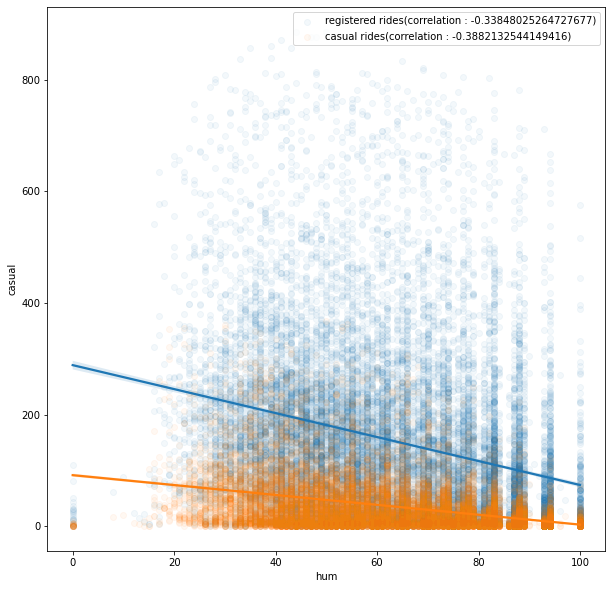

In [27]:
plt.figure(figsize=(10,10))
plot_corr(df,"registered","hum")
plot_corr(df,"casual","hum")
plt.savefig("fig8.png")


## Findings :

- there's a negative correlation between humidity and number of rides:
   which means as humidity goes up, the total number of  rides goes down.

### Affect of Temperature on the total number of rides.

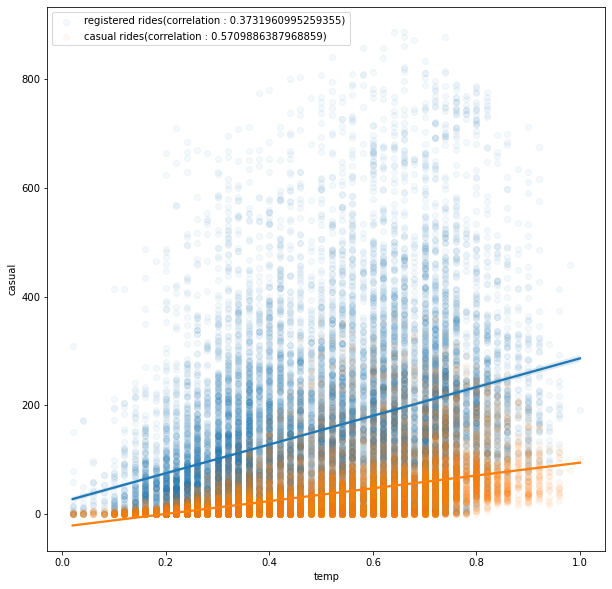

In [28]:
plt.figure(figsize=(10,10))
plot_corr(df,"registered","temp")
plot_corr(df,"casual","temp")
plt.savefig("figs9.png")

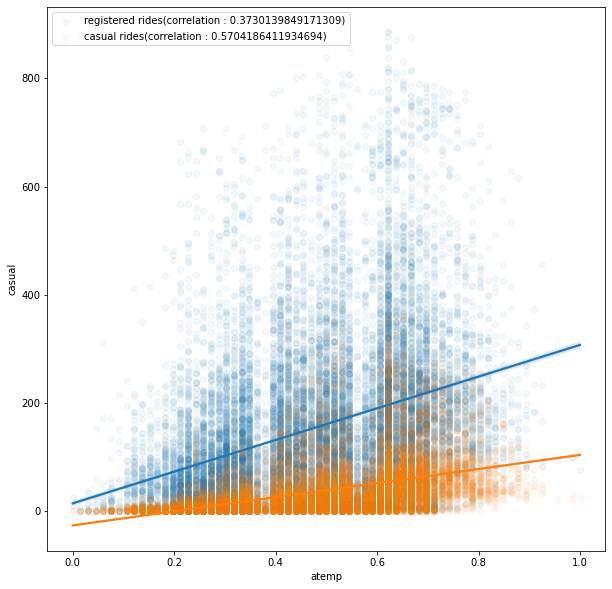

In [29]:
plt.figure(figsize=(10,10))
plot_corr(df,"registered","atemp")
plot_corr(df,"casual","atemp")
plt.savefig("figs10.png")

- there's a strong positive relationship between temp and atemp and the number of rides, Which means as the temperature goes up, the total number of rides goes up

# Correlation matrix

In [31]:
subset = df[["hum","temp","atemp","windspeed","casual","registered"]]
matrix = subset.corr()

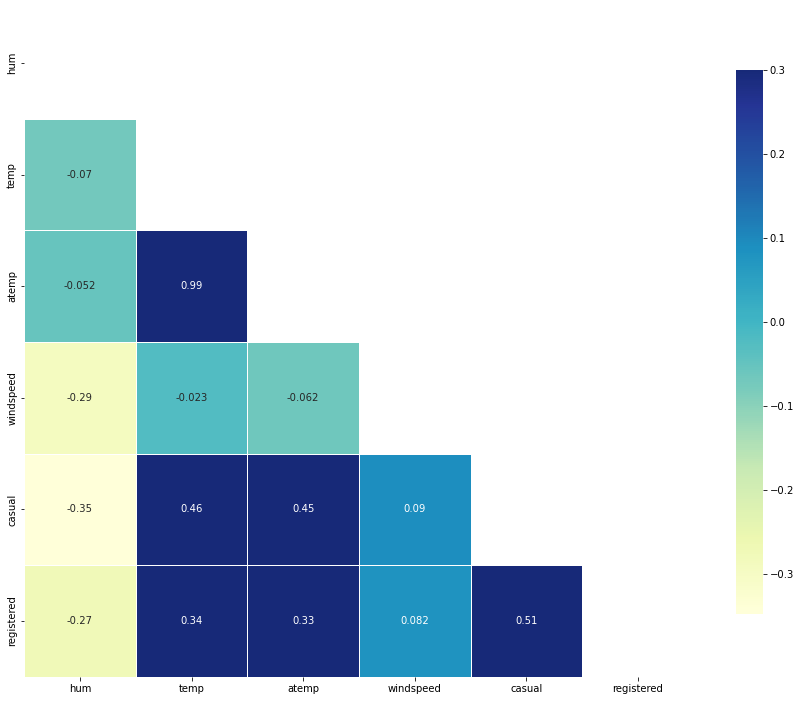

In [32]:
plt.figure(figsize=(15,20))
mask = np.triu(np.ones_like(matrix))
sns.heatmap(matrix, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=mask,annot=True,cmap="YlGnBu")
plt.savefig("figs11.png")            

# Time Series Analysis

### Check for sattionarity

- I will use adfuller test to test stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
# create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]
    plt.figure(figsize=(25,15))
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

In [43]:
daily_rides = df[["dteday", "registered", \
                                 "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()
# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)


<Figure size 1800x1080 with 0 Axes>

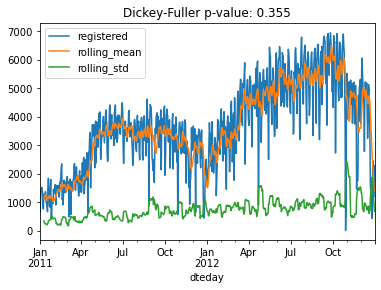

In [44]:

test_stationarity(daily_rides["registered"])

<Figure size 1800x1080 with 0 Axes>

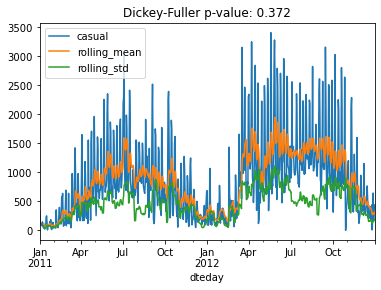

In [45]:
test_stationarity(daily_rides["casual"])

In [46]:
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)
casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

#### From the preceeding plots, The data is not stationary.

<Figure size 1800x1080 with 0 Axes>

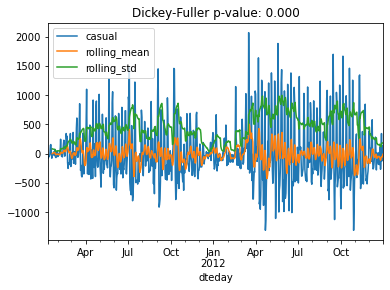

In [47]:
test_stationarity(casual_ma_diff)

<Figure size 1800x1080 with 0 Axes>

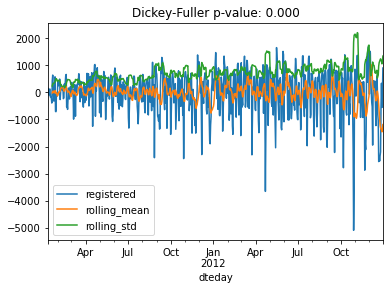

In [48]:
test_stationarity(registered_ma_diff)

Observations : 

- Casual rides increase in summer periods and decrease in winter 

## Time Series Decomposition

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposed = seasonal_decompose(daily_rides["registered"])
casual_decomposed = seasonal_decompose(daily_rides["casual"])


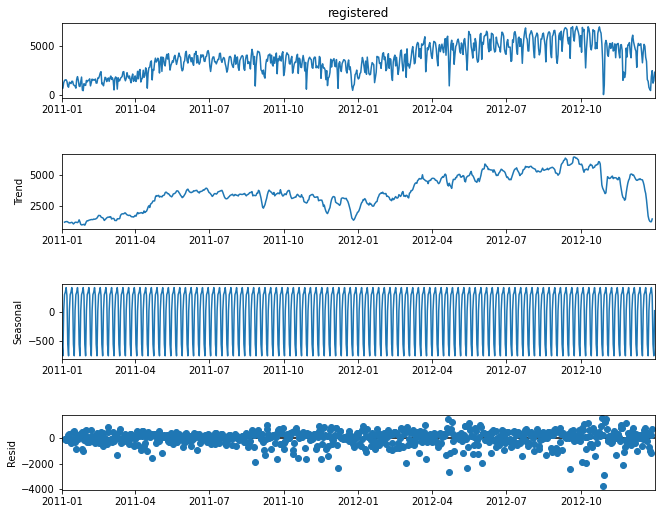

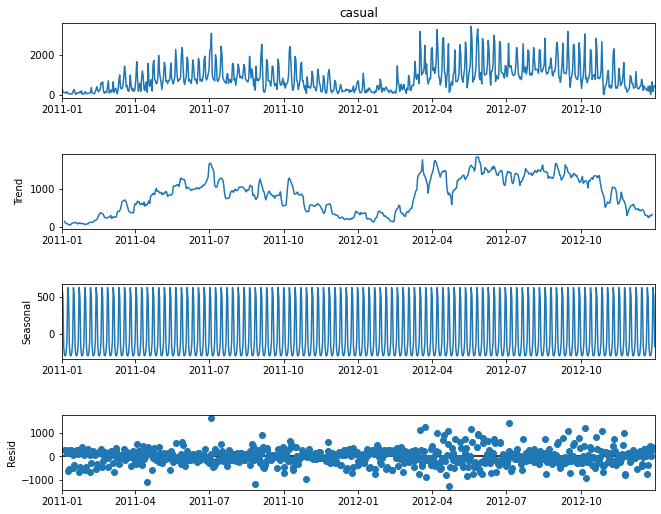

In [50]:
registered_plot = registered_decomposed.plot()
registered_plot.set_size_inches(10, 8)
casual_plot = casual_decomposed.plot()
casual_plot.set_size_inches(10, 8)

###  Impact of weather conditions on number of rides.

In [51]:
def create_regression_plot(data, col, weather_cond):
   
    # extract data for the specific weather condition
    plot_data = df[df['weathersit'] == weather_cond]
    # create regplot for registered users
    ax = sns.regplot(x=col, y="registered", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    # create regplot for casual users
    ax = sns.regplot(x=col, y="casual", data=plot_data, \
                     scatter_kws={"alpha":0.05})
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{col} | {weather_cond}")
    return ax

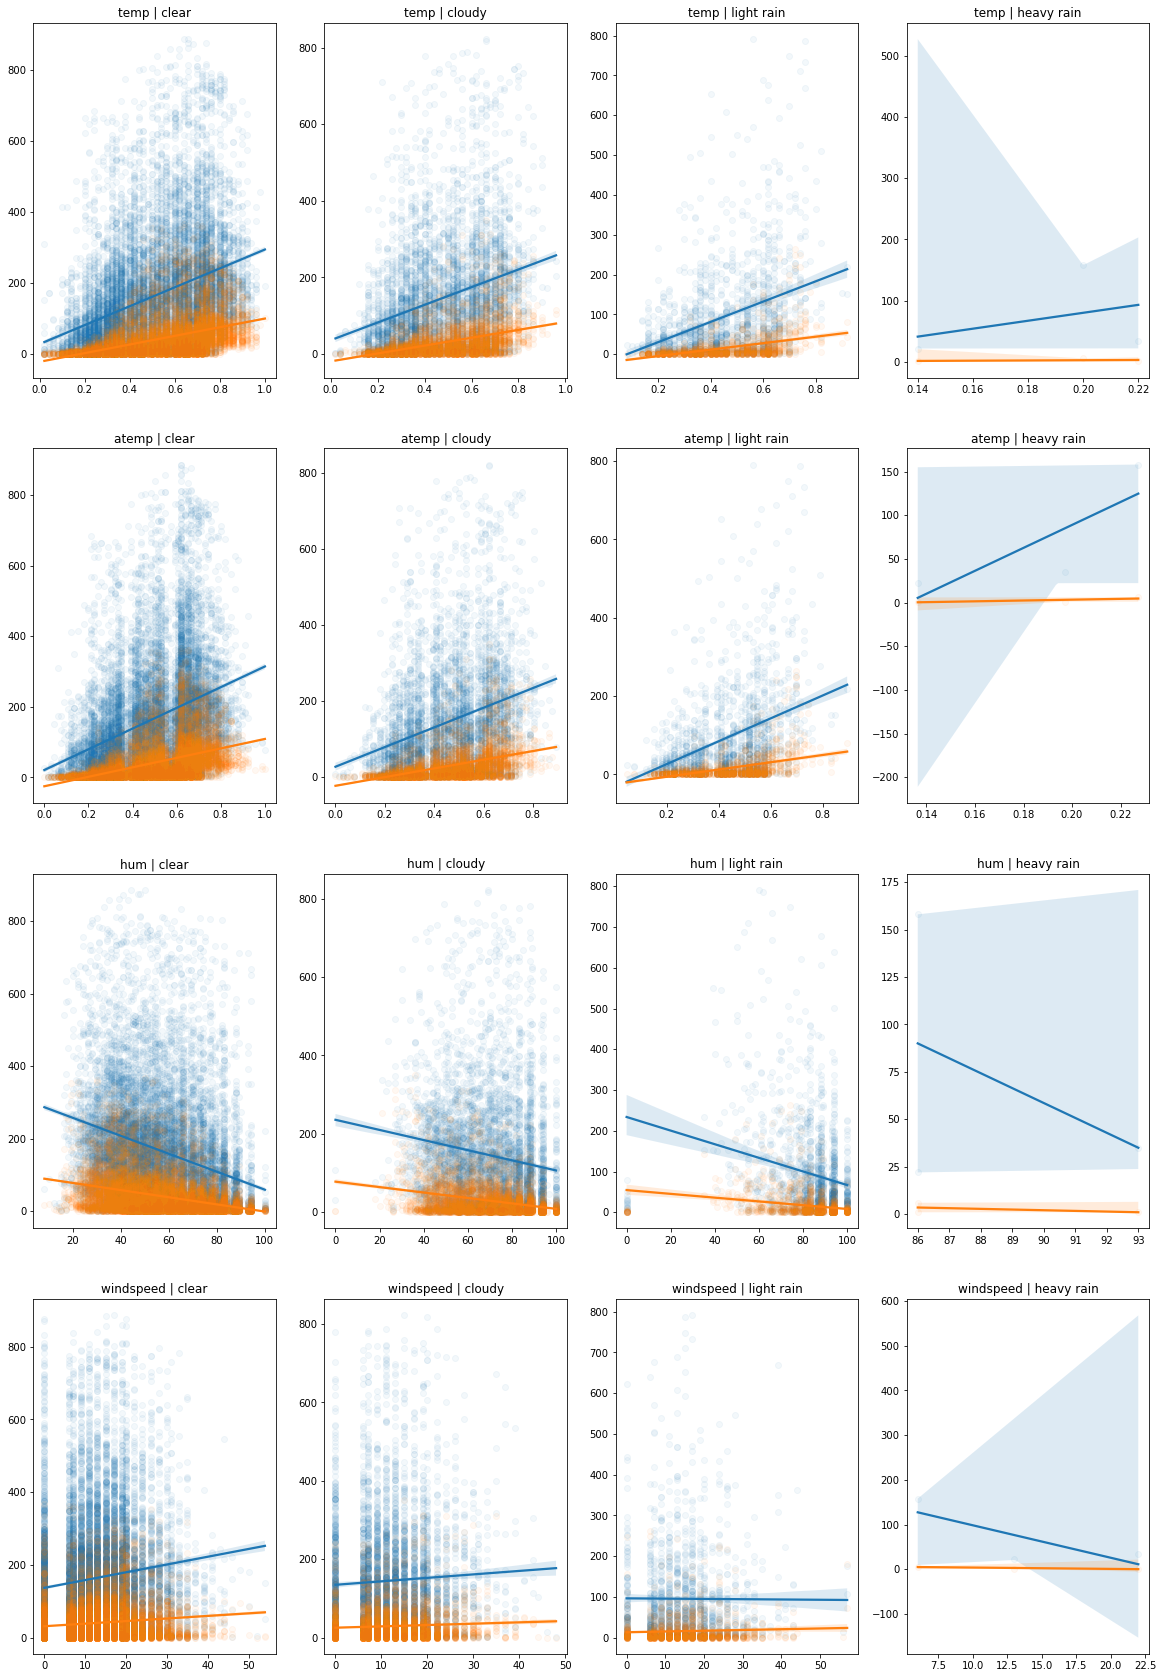

In [52]:
weather_conditions = df.weathersit.unique()
columns = ["temp", "atemp", "hum", "windspeed"]
plt.figure(figsize=(20,30))
for col_index, col in enumerate(columns):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index*4 + 1
        plt.subplot(4,4,plot_number)
        create_regression_plot(plot_number, col, weather_cond)

- Correlation between weather conditions and casual and registered rides

### Pearson Correlations between weather features and rides.

In [53]:
def print_correlations(data, col, weather_cond):
    # extract data for the specific weather condition
    corr_data = data[data['weathersit'] == weather_cond]

    pearson_corr_r = pearsonr(corr_data[col], \
                              corr_data["registered"])
    # compute pearson correlation between col and registered rides
    pearson_corr_c = pearsonr(corr_data[col], corr_data["casual"])
 # print correlations
    print(f"Pearson correlation (registered, {col}): \
corr={pearson_corr_r[0]:.03f}, pval={pearson_corr_r[1]:.03f}")
    print(f"Pearson correlation (casual, {col}): \
corr={pearson_corr_c[0]:.03f}, pval={pearson_corr_c[1]:.03f}")

In [54]:
from scipy.stats import pearsonr
weather_conditions = df.weathersit.unique()
columns = ["temp", "atemp", "hum", "windspeed"]
for col in columns:
    for weather_cond in weather_conditions:
        print_correlations(df, col, weather_cond)


Pearson correlation (registered, temp): corr=0.340, pval=0.000
Pearson correlation (casual, temp): corr=0.459, pval=0.000
Pearson correlation (registered, temp): corr=0.285, pval=0.000
Pearson correlation (casual, temp): corr=0.437, pval=0.000
Pearson correlation (registered, temp): corr=0.356, pval=0.000
Pearson correlation (casual, temp): corr=0.433, pval=0.000
Pearson correlation (registered, temp): corr=0.360, pval=0.766
Pearson correlation (casual, temp): corr=0.277, pval=0.821
Pearson correlation (registered, atemp): corr=0.334, pval=0.000
Pearson correlation (casual, atemp): corr=0.451, pval=0.000
Pearson correlation (registered, atemp): corr=0.285, pval=0.000
Pearson correlation (casual, atemp): corr=0.434, pval=0.000
Pearson correlation (registered, atemp): corr=0.366, pval=0.000
Pearson correlation (casual, atemp): corr=0.445, pval=0.000
Pearson correlation (registered, atemp): corr=0.810, pval=0.399
Pearson correlation (casual, atemp): corr=0.756, pval=0.454
Pearson correlat

# Findings Recap & Business Recommendations

### Findings :

- the number of registered rides are more than casual rides.
- Registered rides use the service mainly for work commuting.
- the casual rides are more in the weekend.
- the total rides drop down in the winter.
- the rides peak is in 8am and 5pm.
- there's a weather impact on the number of rides.
- the rides peak regarding the day is in wedensday.



## Business Suggestions

- doing intensive marketing in winter
- courage registered users to make more rides in the weekend
- make warnings when the weather condition is bad, which can make the customer feel that we care about their lifes
- And More can be done by stakeholders whom have better domain knowledge.

In [2]:
df= pd.read_csv("hour.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [6]:
df["windspeed"].value_counts()

0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.8507       2
0.7164       2
0.7761       1
0.8358       1
Name: windspeed, dtype: int64

In [3]:
df= df.drop(["instant","dteday","yr","holiday","temp","windspeed"],axis=1)

In [4]:
df.head()

,season,mnth,hr,weekday,workingday,weathersit,atemp,hum,casual,registered,cnt
0,1,1,0,6,0,1,0.2879,0.81,3,13,16
1,1,1,1,6,0,1,0.2727,0.80,8,32,40
2,1,1,2,6,0,1,0.2727,0.80,5,27,32
3,1,1,3,6,0,1,0.2879,0.75,3,10,13
4,1,1,4,6,0,1,0.2879,0.75,0,1,1


In [4]:
df["season"]=df["season"].map({1:"winter", 2:"spring", 3:"summer", 4:"fall"})

In [5]:
df["weekday"] = df["weekday"].map( {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'})
df["weathersit"]= df["weathersit"].map({1:"clear",2:"cloudy",3:"light rain",4:"heavy rain"})

In [7]:
df.head()

,season,mnth,hr,weekday,workingday,weathersit,atemp,hum,casual,registered,cnt
0,winter,1,0,Saturday,0,clear,0.2879,0.81,3,13,16
1,winter,1,1,Saturday,0,clear,0.2727,0.80,8,32,40
2,winter,1,2,Saturday,0,clear,0.2727,0.80,5,27,32
3,winter,1,3,Saturday,0,clear,0.2879,0.75,3,10,13
4,winter,1,4,Saturday,0,clear,0.2879,0.75,0,1,1


In [6]:
df = df.drop(["casual","cnt"],axis=1)

In [7]:
df.head()

,season,mnth,hr,weekday,workingday,weathersit,atemp,hum,registered
0,winter,1,0,Saturday,0,clear,0.2879,0.81,13
1,winter,1,1,Saturday,0,clear,0.2727,0.80,32
2,winter,1,2,Saturday,0,clear,0.2727,0.80,27
3,winter,1,3,Saturday,0,clear,0.2879,0.75,10
4,winter,1,4,Saturday,0,clear,0.2879,0.75,1


In [8]:
df = pd.get_dummies(df,columns=["season","weekday","weathersit"])

In [9]:
df.head()

,mnth,hr,workingday,atemp,hum,registered,season_fall,season_spring,season_summer,season_winter,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_cloudy,weathersit_heavy rain,weathersit_light rain
0,1,0,0,0.2879,0.81,13,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,0.2727,0.80,32,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,1,2,0,0.2727,0.80,27,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,1,3,0,0.2879,0.75,10,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,1,4,0,0.2879,0.75,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [12]:
x = df.drop("registered",axis=1).values
y = df.registered.values

In [11]:
from sklearn.model_selection import KFold


ks = KFold(n_splits=5,shuffle=True)


In [14]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_val_score

rr = RandomForestRegressor()
rr.fit(x,y)
cross_val_score(rr,x,y,cv=ks)

array([0.85148082, 0.83305574, 0.86497073, 0.86517278, 0.84225904,
       0.84992632, 0.85181739, 0.86014711, 0.84294215, 0.86029107,
       0.86725168, 0.8404323 , 0.85092605, 0.87317907, 0.86060892])

In [15]:
import pickle as pkl

In [12]:
x2 = df[["hr","atemp","workingday","season_summer","mnth","hum","season_winter","weathersit_light rain"]]
y2 = df["registered"].values

In [41]:
x2.dtypes

hr                         int64
atemp                    float64
workingday                 int64
season_summer              uint8
mnth                       int64
hum                      float64
season_winter              uint8
weathersit_light rain      uint8
dtype: object

In [13]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_val_score

rr2 = RandomForestRegressor()
rr2.fit(x2,y2)
cross_val_score(rr2,x2,y2,cv=ks)

array([0.83059201, 0.83016051, 0.82815791, 0.80977011, 0.82863406])

## Model Save

In [14]:
import pickle as pkl

In [15]:
name = "mode.pkl"
with open(name,"wb") as filename:
    pkl.dump(rr2,filename)